In [1]:
from google.colab import drive
drive.mount('/content/drive')

import torch
import numpy as np

Mounted at /content/drive


In [5]:
from matplotlib import pyplot as plt
x=torch.FloatTensor(range(5)).unsqueeze(1) #리스트 rangd(5)를 이용해 텐서 생성 / unsquezze(1)는 1번째 위치의 차원을 늘려주는 역할, x=torch.Size(5,1)
y=2*x+torch.rand(5,1) #2차원에서 표현 가능한 데이터 생성
num_features=x.shape[1]

w=torch.randn(num_features,1,requires_grad=True)
b=torch.randn(1,requires_grad=True)

learning_rate=1e-3
optimizer=torch.optim.SGD([w,b],lr=learning_rate) #SGD:경사하강법
#내부에 변수를 리스트로 묶어 넣어주고 적절한 학습률을 정하여 자동으로 가중치와 편향을 업데이트한다.

loss_stack=[]
for epoch in range(1001):
  optimizer.zero_grad()
  y_hat=torch.matmul(x,w)+b
  loss=torch.mean((y_hat-y)**2)
  loss.backward()
  optimizer.step()
  loss_stack.append(loss.item())
  
  if epoch%100==0:
    print(f'Epoch {epoch}:{loss.item()}')
    


Epoch 0:0.38749635219573975
Epoch 100:0.13646066188812256
Epoch 200:0.11625216156244278
Epoch 300:0.11194882541894913
Epoch 400:0.10904737561941147
Epoch 500:0.1065339669585228
Epoch 600:0.1043078750371933
Epoch 700:0.10233243554830551
Epoch 800:0.100579634308815
Epoch 900:0.09902382642030716
Epoch 1000:0.09764314442873001


In [6]:
with torch.no_grad():
  y_hat=torch.matmul(x,w)+b

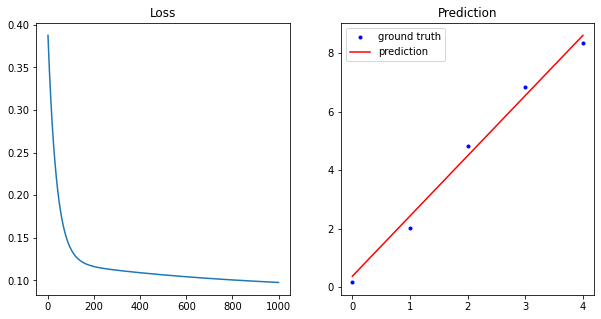

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x,y_hat,'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()
#손실 함수와 회귀선 그래프